# **Analysis of Technical Indicators**
> By Srishti Singh


**EWMA/SMA - Exponentially Weighted Moving Average/Simple Moving Average**

In [1]:
# Importing libraries
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import yfinance as yfin
yfin.pdr_override() # This is crucial to avioid list constraints
import math
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(365)

In [3]:
def get_data(ticker):
  asset = pdr.get_data_yahoo(ticker, start = start_date, end = end_date)
  # This is done to make the date feild into a column
  asset.reset_index(inplace = True)
  return asset

aapl = get_data('AAPL')
aapl

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-20,143.020004,145.889999,142.649994,143.389999,142.544373,64522000
1,2022-10-21,142.869995,147.850006,142.649994,147.270004,146.401489,86548600
2,2022-10-24,147.190002,150.229996,146.000000,149.449997,148.568619,75981900
3,2022-10-25,150.089996,152.490005,149.360001,152.339996,151.441589,74732300
4,2022-10-26,150.960007,151.990005,148.039993,149.350006,148.469223,88194300
...,...,...,...,...,...,...,...
247,2023-10-16,176.750000,179.080002,176.509995,178.720001,178.720001,52517000
248,2023-10-17,176.649994,178.419998,174.800003,177.149994,177.149994,57549400
249,2023-10-18,175.580002,177.580002,175.110001,175.839996,175.839996,54764400
250,2023-10-19,176.039993,177.839996,175.190002,175.460007,175.460007,59245300


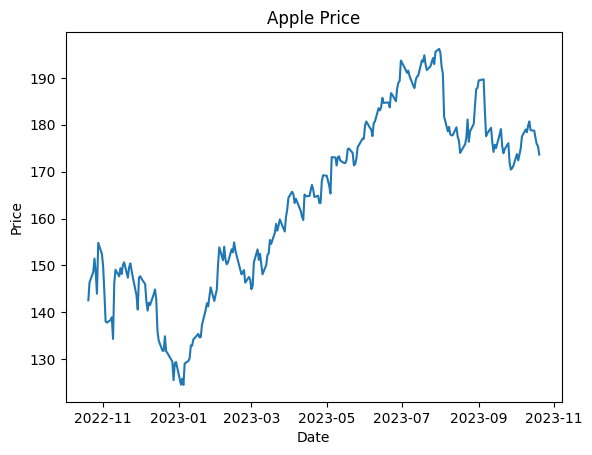

In [4]:
plt.plot(aapl['Date'], aapl['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Price')
plt.show()

In [5]:
# Now we can calculate the values of indicators

aapl_ewm50 = aapl['Adj Close'].ewm(span = 50, adjust = False).mean()
aapl_ewm200 = aapl['Adj Close'].ewm(span = 200, adjust = False).mean()
aapl_sma10 = aapl['Adj Close'].rolling(window = 10).mean()
aapl_sma20 = aapl['Adj Close'].rolling(window = 20).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

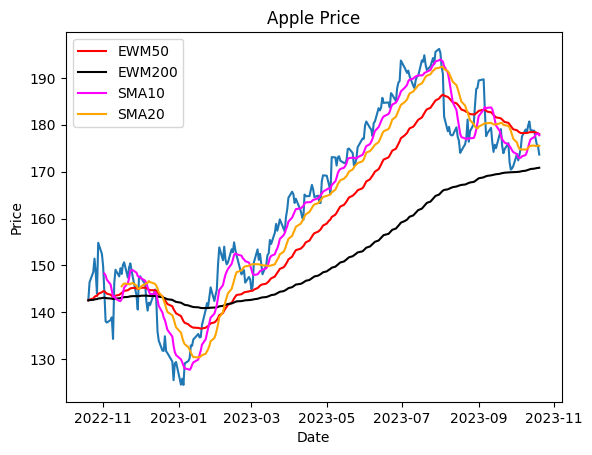

In [7]:
plt.plot(aapl['Date'], aapl['Adj Close'])
plt.plot(aapl['Date'], aapl_ewm50, label = 'EWM50', color = 'red')
plt.plot(aapl['Date'], aapl_ewm200, label = 'EWM200', color = 'black')
plt.plot(aapl['Date'], aapl_sma10, label = 'SMA10', color = 'magenta')
plt.plot(aapl['Date'], aapl_sma20, label = 'SMA20', color = 'orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Price')
plt.legend(loc = 'upper left')
plt.show